In [1]:
import scipy.special as scs
# import scipy.misc as scm
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
### バーンシュタイン基底関数 : (t + (1 - t))^n のうち、指定された一つの項を返す
def bernstein(n, i, t):
    return scs.comb(n, i) * t**i * (1 - t)**(n-i)

### バーンシュタイン多項式 : (t + (1 - t))^n の全項を返す(リスト)
def bernstein_whole(n, t):
    return np.asarray([bernstein(n, i, t) for i in range(n + 1)])


### 制御点(始点・終点含む)をN点与えると、始点と終点を通るNー1次曲線の中の一点を返す(tの値に対応した値)
# def _bezier(n, t, q):
#     p = np.dot([bernstein(n, i, t) for i in range(n + 1)], q)
#     return p

def bezier(t, q):
    n = q.shape[0] - 1
    p = np.dot(bernstein_whole(n,t), q)
    return p

### 制御点(始点・終点含む)をN点与えると、始点と終点を通るNー1次曲線を返す
def bezier_curve(q):
    return np.asarray([bezier(t, q) for t in np.linspace(0, 1, 1000)])

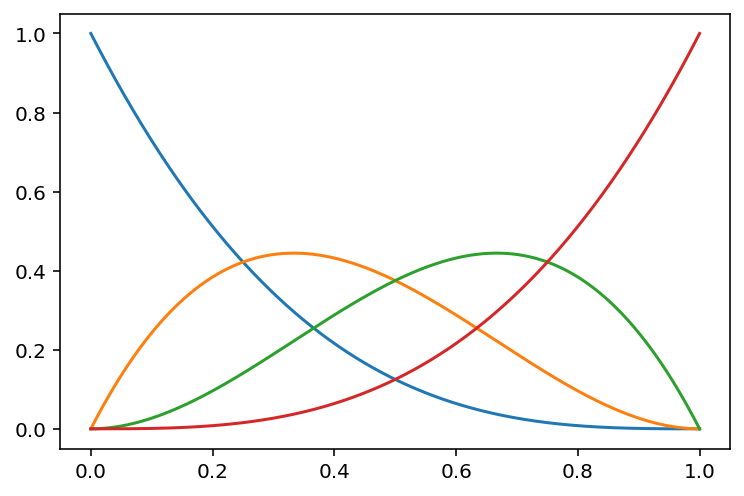

<Figure size 432x288 with 0 Axes>

In [3]:
### bernstein curve (n = 3)　の t=0.02のときの各項の値
a = [bernstein(3, i, 0.02) for i in range(3 + 1)]
# a

### bernstein curveによる、4点に対する重みの変動をグラフ化
bernstein_line = []
bernstein_dim = 3 # ベジェ曲線のコンテキストであれば制御点の数 - 1

t = np.linspace(0, 1, 1000)

for _t in t:
    bernstein_line.append(bernstein_whole(bernstein_dim, _t))

bernstein_line = np.asarray(bernstein_line).transpose((1,0))
bernstein_line.shape    
    
for i in range(bernstein_dim + 1):
    plt.plot(t, bernstein_line[i])

plt.show()
plt.clf()

In [4]:
### 制御点として4点を定義
# q = np.array([[0, 0], [1, 1], [4, -1], [5, 0]], dtype=np.float)
# q = np.array([[0, 0], [0.2, 1], [0.5, -1], [1, 1]], dtype=np.float)
# q = np.array([[0,0],[0.3,0.3],[0.65,0.65],[1,1]])
q = np.array([[0,0],[33,20],[66,-20],[100,10]])


### 制御点からベジェ曲線を計算
# P = np.array([_bezier(3, t, q) for t in np.linspace(0, 1, 1000)])
P = bezier_curve(q)


# list = []
# for t in np.linspace(0, 1, 100):
#     list.append(bezier(3, t, q))
# P = np.array(list)

In [5]:
### ベジェ曲線の最初の5点
# P[:5]

In [6]:
### ベジェ曲線のxの値
# P.T[0]

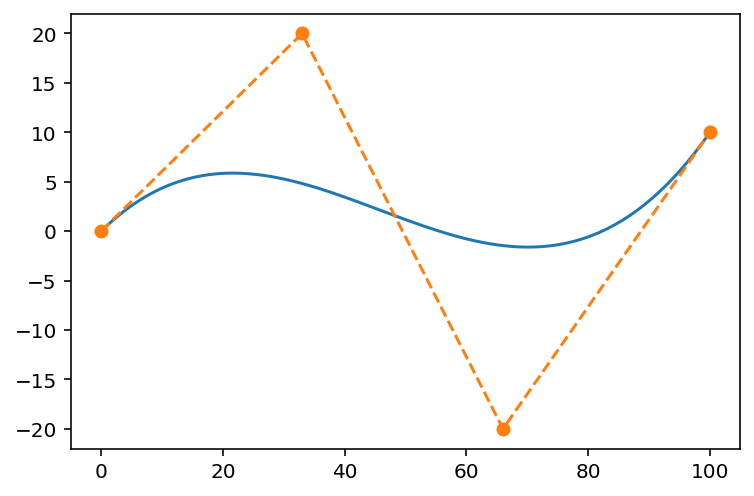

<Figure size 432x288 with 0 Axes>

In [7]:
### 制御点と対応するベジェ曲線のグラフ
plt.plot(P.T[0], P.T[1])
plt.plot(q.T[0], q.T[1], '--o')
plt.show()
plt.clf()

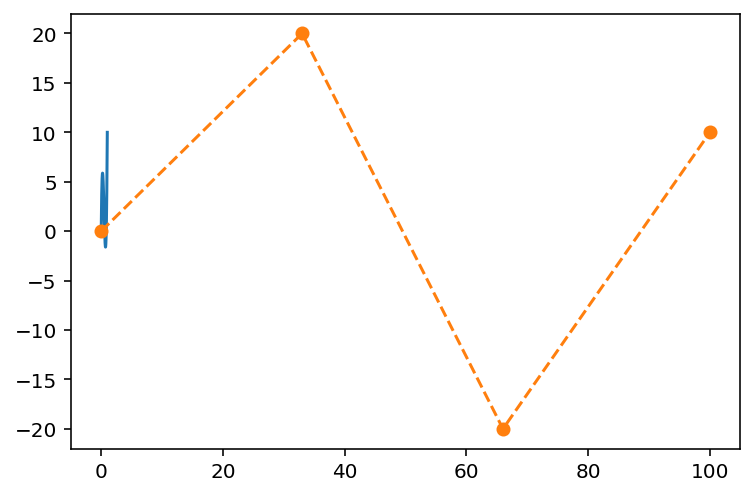

<Figure size 432x288 with 0 Axes>

In [8]:
# xの補正がないと
plt.plot(t, P.T[1])
plt.plot(q.T[0], q.T[1], '--o')
plt.show()
plt.clf()

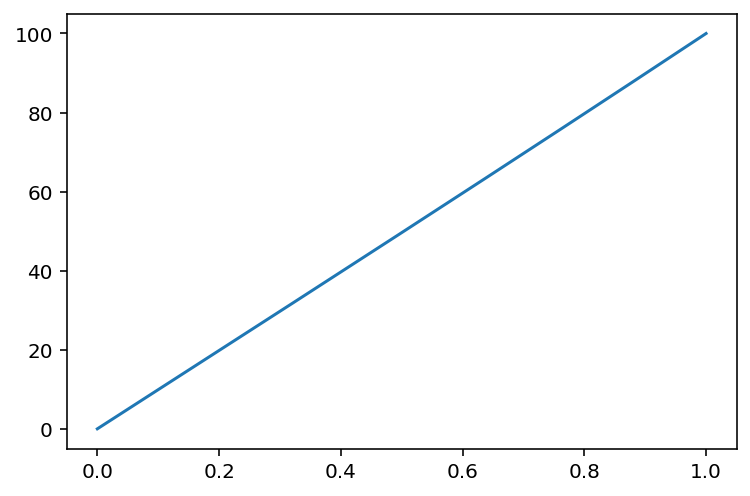

<Figure size 432x288 with 0 Axes>

In [9]:
# xに関して -> 制御点が等間隔であれば直線になる（等間隔）　→　tをmax(x)倍にする操作になっている
plt.plot(t, P.T[0])
plt.show()
plt.clf()

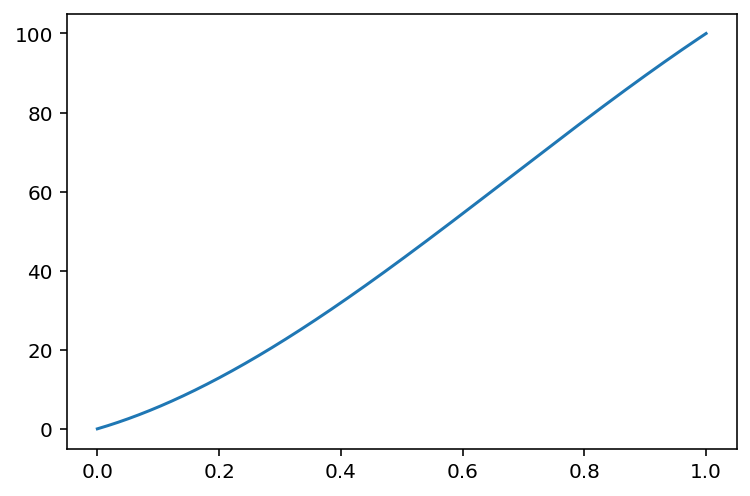

<Figure size 432x288 with 0 Axes>

In [10]:
# xに関して -> 制御点が等間隔でないとxに関しても歪みが生じる
q = np.array([[0,0],[15,20],[66,-20],[100,10]])
P = bezier_curve(q)

plt.plot(t, P.T[0])
plt.show()
plt.clf()

In [8]:
### 制御点がグリッド状の場合のベジェ曲線の一点(u, vに対応)を返す
### tensor積での計算方法
def bezier_patches(m, n, u, v, q):
    return np.dot([bernstein(n, j, v) for j in range(n + 1)],
                  np.tensordot([bernstein(m, i, u) for i in range(m + 1)], q, axes=1))

### tensor積を使わない計算方法
# def bezier_patches(m, n, u, v, q):
#     p = np.zeros(2)
#     for i in range(m + 1):
#         for j in range(n + 1):
#             p += bernstein(m, i, u) * bernstein(n, j, v) * q[i, j]
#     return p

def bezier2D(u, v, q):
    m = q.shape[0] - 1
    n = q.shape[1] - 1
    bernstein_terms_x = bernstein_whole(m, u)
    bernstein_terms_y = bernstein_whole(n, v)
    x_bezier = np.tensordot(bernstein_terms_x, q, axes=(0,0))
    return np.tensordot(bernstein_terms_y, x_bezier, axes=(0,1))


### 制御点がグリッド状の場合のベジェ曲線の平面を返す
def bezier_curve2D(q):
    u = np.linspace(0, 1, 10)
    v = np.linspace(0, 1, 10)
    return bezier2D(u, v, q)

In [9]:
### グリッド状の制御点
q = np.array([
    [[0, 0], [0.5, 1], [0.2, 3], [0, 5]],
    [[1, 1], [1, 2], [1, 4], [1, 6]],
    [[2, 1], [2, 3], [2, 5], [2, 6]],
    [[4, 1], [4, 3], [4, 4], [4, 5]],
    [[5, 0], [6, 1], [6, 3], [5, 5]],
    ])

# list1 = []
# for u in np.linspace(0, 1, 10):
#     list2 = []
#     for v in np.linspace(0, 1, 10):
#         list2.append(bezier_patches(4, 3, u, v, q))
#     list1.append(list2)
# P = np.array(list1)

P = bezier_curve2D(q)

In [15]:
### q[0,:] の制御点に対するベジェ曲線
P.transpose(1,0,2)[0,:,:]

array([[0.        , 0.        ],
       [0.1382716 , 0.36899863],
       [0.22469136, 0.80384088],
       [0.26666667, 1.2962963 ],
       [0.27160494, 1.83813443],
       [0.24691358, 2.42112483],
       [0.2       , 3.03703704],
       [0.1382716 , 3.6776406 ],
       [0.0691358 , 4.33470508],
       [0.        , 5.        ]])

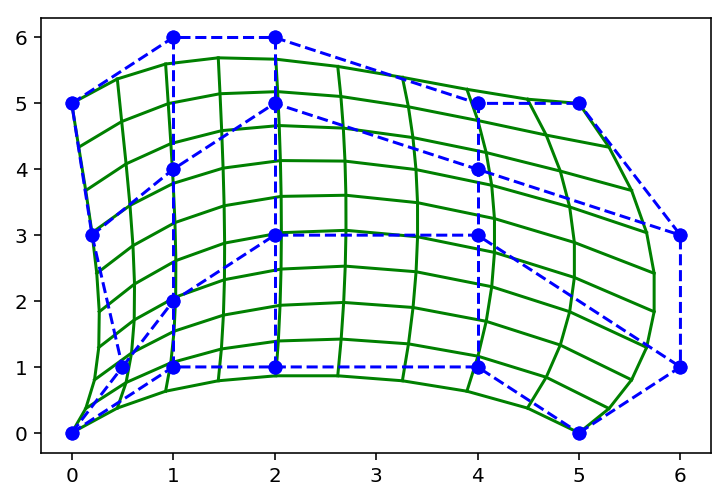

In [16]:
for i in range(10):
    plt.plot(P[i].T[0], P[i].T[1], color='g')
    P_T = np.array([P[j, i] for j in range(10)])
    plt.plot(P_T.T[0], P_T.T[1], color='g')

for i in range(5):
    plt.plot(q[i].T[0], q[i].T[1], '--o', color='b')
for j in range(4):
    q_T = np.array([q[i, j] for i in range(5)])
    plt.plot(q_T.T[0], q_T.T[1], '--o', color='b')

plt.show()
plt.clf()

In [77]:
# q = np.array([
#     [[0, 0, 1], [0, 1, 2], [0, 3, 3], [0, 5, 4]],
#     [[1, 1, 3], [1, 2, 4], [1, 4, 1], [1, 6, 2]],
#     [[2, 1, 2], [2, 3, 1], [2, 5, 0], [2, 6, 0]],
#     [[4, 1, 4], [4, 3, 1], [4, 4, 4], [4, 5, 3]],
#     [[5, 0, 0], [6, 1, 4], [6, 3, 2], [5, 5, 5]],
#     ])

# list1 = []
# for u in np.linspace(0, 1, 100):
#     list2 = []
#     for v in np.linspace(0, 1, 100):
#         list2.append(bezier_patches(4, 3, u, v, q))
#     list1.append(list2)
# P = np.array(list1)